<a href="https://colab.research.google.com/github/stefcian/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter01/Back_propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
x = np.array([[1,1]])
y = np.array([[0]])

In [24]:
from copy import deepcopy
import numpy as np
def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs,weights[0])+ weights[1]
    print("\nhidden before activation = " + str(pre_hidden))
    hidden = 1/(1+np.exp(-pre_hidden))
    print("hidden after activation = " + str(hidden))
    out = np.dot(hidden, weights[2]) + weights[3]
    print("out value = " + str(out))
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

In [25]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    print("loss_original = " + str(original_loss))
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            print("\ntemp_weights[" + str(i) + "][" + str(index) + "] = " + str(temp_weights[i][index]) + " before +0.0001 perturbation")
            temp_weights[i][index] += 0.0001
            print("temp_weights[" + str(i) + "][" + str(index) + "] = " + str(temp_weights[i][index]) + " after +0.0001 perturbation")
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
            print("loss_plus = " + str(_loss_plus))
            print("grad = " + str(grad))
            print("lr = " + str(lr))
            print("updated_weights[" + str(i) + "][" + str(index) + "] = " + str(updated_weights[i][index]))
    return updated_weights, original_loss

In [26]:
W = [
    np.array([[0.8, 0.2],
              [0.4, 0.9],
              [0.3, 0.5]], dtype=np.float32).T,
    np.array([-0.1, 0.5, -0.6], dtype=np.float32),
    np.array([[ 0.3, 0.5, 0.9]], dtype=np.float32).T,
    np.array([-0.5], dtype=np.float32)
]

Streaming output truncated to the last 5000 lines.
hidden after activation = [[0.70426837 0.85378644 0.51265211]]
out value = [[-2.08709415e-05]]
loss_plus = 4.355961976063027e-10
grad = -1.1784997853778641e-05
lr = 0.01
updated_weights[0][(0, 2)] = 0.25017828

temp_weights[0][(1, 0)] = 0.18923813 before +0.0001 perturbation
temp_weights[0][(1, 0)] = 0.18933813 after +0.0001 perturbation

hidden before activation = [[0.86780713 1.76461276 0.05051926]]
hidden after activation = [[0.7042892  0.85378644 0.51262713]]
out value = [[-3.74566395e-05]]
loss_plus = 1.4029998445333883e-09
grad = -2.110961384507786e-06
lr = 0.01
updated_weights[0][(1, 0)] = 0.18923815

temp_weights[0][(1, 1)] = 0.88818663 before +0.0001 perturbation
temp_weights[0][(1, 1)] = 0.88828665 after +0.0001 perturbation

hidden before activation = [[0.86770713 1.76471278 0.05051926]]
hidden after activation = [[0.70426837 0.85379892 0.51262713]]
out value = [[-3.64944132e-05]]
loss_plus = 1.3318421944456574e-09
grad = -2

Text(0.5, 1.0, 'Loss over increasing number of epochs')

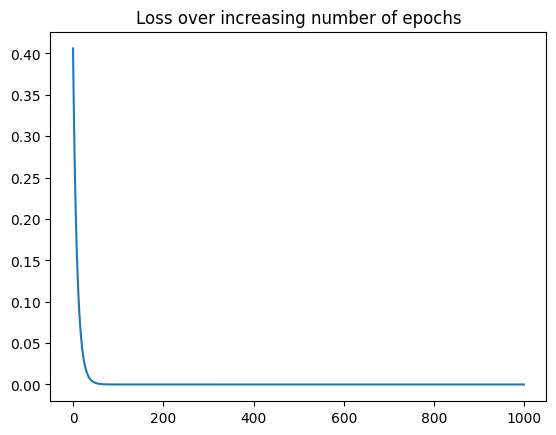

In [27]:
losses = []
for epoch in range(1000):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)
plt.plot(losses)
plt.title('Loss over increasing number of epochs')

In [28]:
W

[array([[0.7892253 , 0.3882142 , 0.2501822 ],
        [0.18923864, 0.88818663, 0.45018134]], dtype=float32),
 array([-0.11075553,  0.48821396, -0.6498321 ], dtype=float32),
 array([[0.13056025],
        [0.2948614 ],
        [0.77279603]], dtype=float32),
 array([-0.73989695], dtype=float32)]

In [29]:
pre_hidden = np.dot(x,W[0]) + W[1]
hidden = 1/(1+np.exp(-pre_hidden))
out = np.dot(hidden, W[2]) + W[3]

In [30]:
out

array([[-4.01604562e-05]])